Restaurant Food Cost:


Project Description:

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. 

Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:

1. train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2. test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes:

TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.

RESTAURANT_ID: A unique ID for each restaurant.

CUISINES: The variety of cuisines that the restaurant offers.

TIME: The open hours of the restaurant.

CITY: The city in which the restaurant is located.

LOCALITY: The locality of the restaurant.

RATING: The average rating of the restaurant by customers.

VOTES: The overall votes received by the restaurant.

COST: The average cost of a two-person meal.

Dataset Link-

•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Restaurant%20Food%20Cost

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx


*Statement Problem:To build a model that will predict cost of the food served by the restaurants across different cities in India*.

To build a predictive model for restaurant food costs, we will follow these steps:

1. Load the Dataset
2. Data Preprocessing
3. Exploratory Data Analysis (EDA)
4. Model Training
5. Model Evaluation
6. Make Predictions on the Test Set
7. Save Predictions

In [1]:
#Import training libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings ("ignore")

Load the Dataset

In [2]:
#import the dataset
link_1="https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx?raw=true"

link_2="https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx?raw=true"

train_rest=pd.read_excel(link_1)
test_rest=pd.read_excel(link_2)

In [3]:
train_rest

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


Observation:

The train datasets the contains all the details related to restaurant food cost and the datas has both continuous and categorical datas. There are 12690 samples in the datasets with 9 columns columns in the train dataset of which 1 is the target variable “COST”.


In [4]:
test_rest.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


Data Preprocessing

In [5]:
#Columns present in the dataset 
train_rest.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [6]:
#shape of the Data
train_rest.shape

(12690, 9)

In [7]:
# Checking the column information Training dataset
train_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


Observation:
The training-set has 12690 samples and 9 features + the target variable (COST). 
2 of the features are integers and 7 are objects. The datas also shows some features having missing datas shown below has missing values which will be dealt with shortly.

CITY              112
LOCALITY           98
RATING              2
VOTES            1204:

In [8]:
# Check for missing values Training
train_rest.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [9]:
total = train_rest.isnull().sum().sort_values(ascending=False)
percent_1 = train_rest.isnull().sum()/train_rest.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
VOTES,1204,9.5
CITY,112,0.9
LOCALITY,98,0.8
RATING,2,0.0
TITLE,0,0.0
RESTAURANT_ID,0,0.0
CUISINES,0,0.0
TIME,0,0.0
COST,0,0.0


In [10]:
# Checking the column information Testing dataset
test_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [11]:
# Check for missing values Test
test_rest.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [12]:
# Fill missing values
train_rest.fillna({'RATING': train_rest['RATING'].mode()[0], 'VOTES': train_rest['VOTES'].mode()[0], 'CITY': train_rest['CITY'].mode()[0],'LOCALITY': train_rest['LOCALITY'].mode()[0]}, inplace=True)
test_rest.fillna({'RATING': test_rest['RATING'].mode()[0], 'VOTES': test_rest['VOTES'].mode()[0],'CITY': test_rest['CITY'].mode()[0],'LOCALITY': test_rest['LOCALITY'].mode()[0]}, inplace=True)

In [13]:
test_rest.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
dtype: int64

In [14]:
train_rest.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

All the missing values have been filled using mode.

Exploratory Data Analysis (EDA)

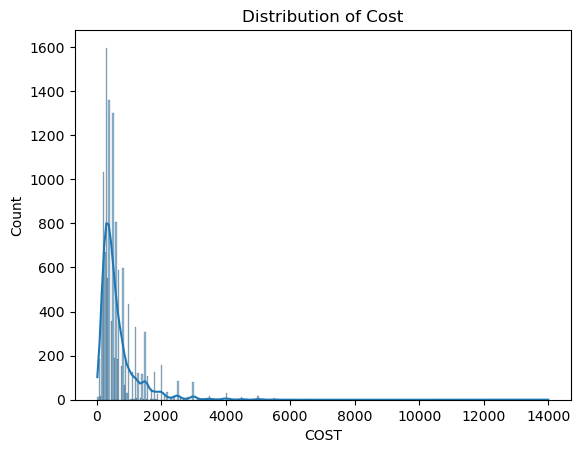

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.histplot(train_rest['COST'], kde=True)
plt.title('Distribution of Cost')
plt.show()

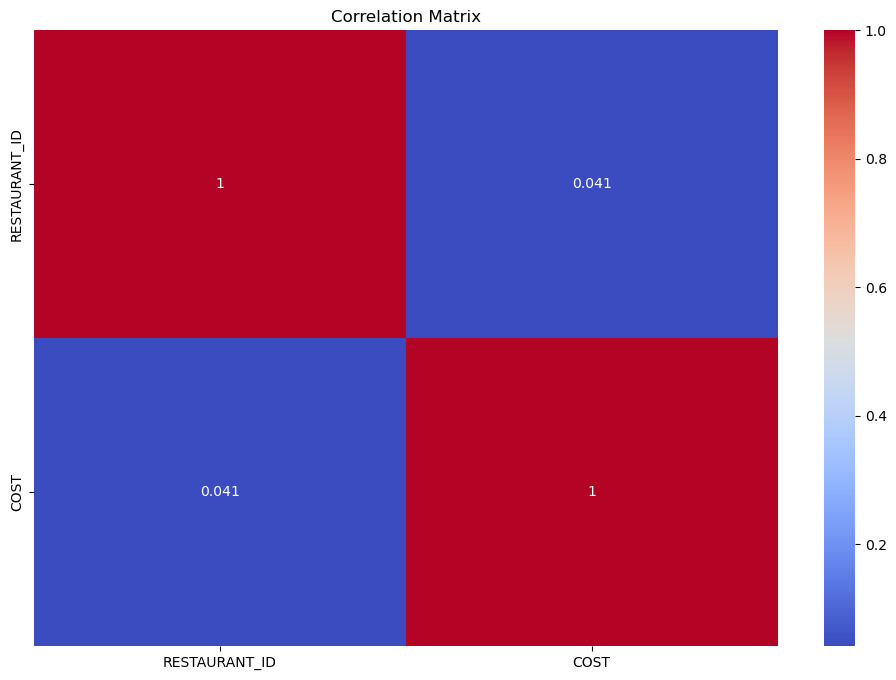

In [16]:
# Correlation matrix
corr = train_rest.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
# Define input features and target variable
x = train_rest.drop(['RESTAURANT_ID', 'COST'], axis=1)
y = train_rest['COST']
test_rest=test_rest.drop(["RESTAURANT_ID"], axis=1)


In [18]:
# Encode categorical variables using one-hot encoding
x = pd.get_dummies(x, drop_first=True)
test_rest = pd.get_dummies(test_rest, drop_first=True)

In [19]:
# The training and testing datasets must have the same columns
missing_cols = set(x.columns) - set(test_rest.columns)
for col in missing_cols:
    test_rest[col] = 0
test_rest = test_rest[x.columns]

In [20]:
x

,"TITLE_BAKERY,BEVERAGE SHOP","TITLE_BAKERY,CAFÉ","TITLE_BAKERY,CONFECTIONERY","TITLE_BAKERY,DESSERT PARLOR","TITLE_BAKERY,FOOD COURT","TITLE_BAKERY,QUICK BITES","TITLE_BAKERY,SWEET SHOP",TITLE_BAR,"TITLE_BAR,CAFÉ","TITLE_BAR,CASUAL DINING",...,VOTES_989 votes,VOTES_99 votes,VOTES_990 votes,VOTES_991 votes,VOTES_992 votes,VOTES_993 votes,VOTES_996 votes,VOTES_997 votes,VOTES_998 votes,VOTES_999 votes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12685,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12686,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12688,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_rest

,"TITLE_BAKERY,BEVERAGE SHOP","TITLE_BAKERY,CAFÉ","TITLE_BAKERY,CONFECTIONERY","TITLE_BAKERY,DESSERT PARLOR","TITLE_BAKERY,FOOD COURT","TITLE_BAKERY,QUICK BITES","TITLE_BAKERY,SWEET SHOP",TITLE_BAR,"TITLE_BAR,CAFÉ","TITLE_BAR,CASUAL DINING",...,VOTES_989 votes,VOTES_99 votes,VOTES_990 votes,VOTES_991 votes,VOTES_992 votes,VOTES_993 votes,VOTES_996 votes,VOTES_997 votes,VOTES_998 votes,VOTES_999 votes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training and Evaluation:

Split the training data and train a regression model.


In [22]:
# Spliting the data into Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

1. Random Forest:

In [23]:
#Model Training
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
pred_random_forest = random_forest.predict(x_test)
pred_train = random_forest.predict(x_train)
print(random_forest)
print("R2_Score: ", r2_score(y_test, pred_random_forest)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_random_forest))
print("Mean Squared error: ", mean_squared_error(y_test, pred_random_forest))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_random_forest)))

RandomForestRegressor()
R2_Score:  72.11772261662924
R2_Score on training Data:  95.96745308945842
Mean Absolute error:  183.7502282449623
Mean Squared error:  100348.2807163626
Root Mean Squared error:  316.777967536195


2. Logistic Regression:

In [28]:
logreg = LinearRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
pred_train = logreg.predict(x_train)
print(logreg)
print("R2_Score: ", r2_score(y_test, pred_logreg)*100)
print("R2_Score on training Data: ", r2_score(y_train, pred_train)*100)
print("Mean Absolute error: ", mean_absolute_error(y_test, pred_logreg))
print("Mean Squared error: ", mean_squared_error(y_test, pred_logreg))
print("Root Mean Squared error: ", np.sqrt(mean_squared_error(y_test, pred_logreg)))

LinearRegression()
R2_Score:  -3.5223667264813213e+25
R2_Score on training Data:  96.05933642415567
Mean Absolute error:  108115831571211.12
Mean Squared error:  1.2676993352979534e+29
Root Mean Squared error:  356047656262185.44


As we can see, Random Forest Regressor has the best R2_score, indicating the best model.

Final Model:

In [31]:
# Initialize the model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(x,y)

RandomForestRegressor(random_state=42)

In [32]:
# Predict on the test set
test_predictions = random_forest.predict(test_rest)
test_rest['COST'] = test_predictions


In [36]:
test_rest

,"TITLE_BAKERY,BEVERAGE SHOP","TITLE_BAKERY,CAFÉ","TITLE_BAKERY,CONFECTIONERY","TITLE_BAKERY,DESSERT PARLOR","TITLE_BAKERY,FOOD COURT","TITLE_BAKERY,QUICK BITES","TITLE_BAKERY,SWEET SHOP",TITLE_BAR,"TITLE_BAR,CAFÉ","TITLE_BAR,CASUAL DINING",...,VOTES_99 votes,VOTES_990 votes,VOTES_991 votes,VOTES_992 votes,VOTES_993 votes,VOTES_996 votes,VOTES_997 votes,VOTES_998 votes,VOTES_999 votes,COST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1086.5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,414.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,590.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,311.5
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,361.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,904.5
4227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,498.5
4228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,378.5
4229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,278.0


In [35]:
# Save the predictions
test_rest['COST'].to_csv('restaurant_cost_predictions.csv', index=False)
print('Predictions saved to restaurant_cost_predictions.csv')


Predictions saved to restaurant_cost_predictions.csv
